<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,79.782630,-0.007206,89.775424,89.779321,-0.003898
1,0.0,1.0,66.157233,-0.028074,76.129160,76.154584,-0.025425
2,0.0,2.0,57.323877,0.019032,67.342909,67.321655,0.021254
3,0.0,3.0,77.195003,-0.025484,87.169519,87.191820,-0.022301
4,0.0,4.0,86.413969,-0.009403,96.404566,96.410339,-0.005773
...,...,...,...,...,...,...,...
59995,999.0,55.0,28.941321,0.046163,38.987484,38.937148,0.050336
59996,999.0,56.0,43.976980,0.036224,54.013204,53.973547,0.039657
59997,999.0,57.0,91.175624,-0.006283,101.169340,101.174511,-0.005171
59998,999.0,58.0,21.964157,-0.039958,31.924199,31.959642,-0.035443


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,79.782630,-0.007206,89.775424,89.779321,-0.003898
1,0.0,1.0,66.157233,-0.028074,76.129160,76.154584,-0.025425
2,0.0,2.0,57.323877,0.019032,67.342909,67.321655,0.021254
3,0.0,3.0,77.195003,-0.025484,87.169519,87.191820,-0.022301
4,0.0,4.0,86.413969,-0.009403,96.404566,96.410339,-0.005773
...,...,...,...,...,...,...,...
59995,999.0,55.0,28.941321,0.046163,38.987484,38.937148,0.050336
59996,999.0,56.0,43.976980,0.036224,54.013204,53.973547,0.039657
59997,999.0,57.0,91.175624,-0.006283,101.169340,101.174511,-0.005171
59998,999.0,58.0,21.964157,-0.039958,31.924199,31.959642,-0.035443


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    79.782630 -0.007206   89.775424   89.779321 -0.003898
      1.0    66.157233 -0.028074   76.129160   76.154584 -0.025425
      2.0    57.323877  0.019032   67.342909   67.321655  0.021254
      3.0    77.195003 -0.025484   87.169519   87.191820 -0.022301
      4.0    86.413969 -0.009403   96.404566   96.410339 -0.005773
...                ...       ...         ...         ...       ...
999.0 55.0   28.941321  0.046163   38.987484   38.937148  0.050336
      56.0   43.976980  0.036224   54.013204   53.973547  0.039657
      57.0   91.175624 -0.006283  101.169340  101.174511 -0.005171
      58.0   21.964157 -0.039958   31.924199   31.959642 -0.035443
      59.0   83.802523  0.003705   93.806228   93.801049  0.005180

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    79.782630 -0.007206   89.775424   89.779321 -0.003898
      1.0    66.157233 -0.028074   76.129160   76.154584 -0.025425
      2.0    57.323877  0.019032   67.342909   67.321655  0.021254
      3.0    77.195003 -0.025484   87.169519   87.191820 -0.022301
      4.0    86.413969 -0.009403   96.404566   96.410339 -0.005773
...                ...       ...         ...         ...       ...
999.0 55.0   28.941321  0.046163   38.987484   38.937148  0.050336
      56.0   43.976980  0.036224   54.013204   53.973547  0.039657
      57.0   91.175624 -0.006283  101.169340  101.174511 -0.005171
      58.0   21.964157 -0.039958   31.924199   31.959642 -0.035443
      59.0   83.802523  0.003705   93.806228   93.801049  0.005180

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,79.782630,-0.007206,89.775424,89.779321,-0.003898
1,0.0,1.0,66.157233,-0.028074,76.129160,76.154584,-0.025425
2,0.0,2.0,57.323877,0.019032,67.342909,67.321655,0.021254
3,0.0,3.0,77.195003,-0.025484,87.169519,87.191820,-0.022301
4,0.0,4.0,86.413969,-0.009403,96.404566,96.410339,-0.005773
...,...,...,...,...,...,...,...
59995,999.0,55.0,28.941321,0.046163,38.987484,38.937148,0.050336
59996,999.0,56.0,43.976980,0.036224,54.013204,53.973547,0.039657
59997,999.0,57.0,91.175624,-0.006283,101.169340,101.174511,-0.005171
59998,999.0,58.0,21.964157,-0.039958,31.924199,31.959642,-0.035443


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    79.782630 -0.007206   89.775424   89.779321 -0.003898
      1.0    66.157233 -0.028074   76.129160   76.154584 -0.025425
      2.0    57.323877  0.019032   67.342909   67.321655  0.021254
      3.0    77.195003 -0.025484   87.169519   87.191820 -0.022301
      4.0    86.413969 -0.009403   96.404566   96.410339 -0.005773
...                ...       ...         ...         ...       ...
999.0 55.0   28.941321  0.046163   38.987484   38.937148  0.050336
      56.0   43.976980  0.036224   54.013204   53.973547  0.039657
      57.0   91.175624 -0.006283  101.169340  101.174511 -0.005171
      58.0   21.964157 -0.039958   31.924199   31.959642 -0.035443
      59.0   83.802523  0.003705   93.806228   93.801049  0.005180

[60000 rows x 5 columns]

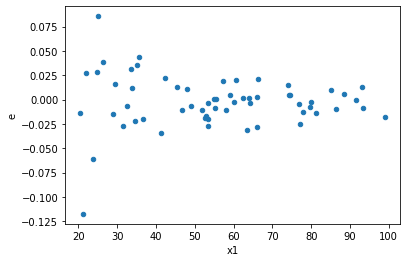

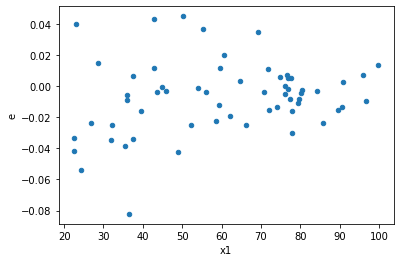

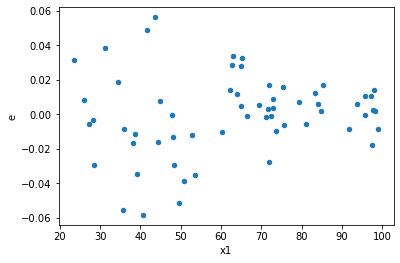

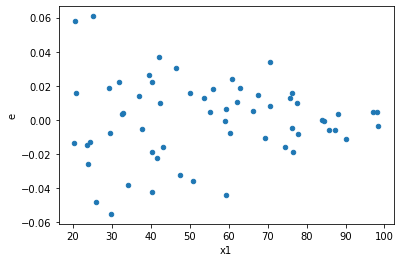

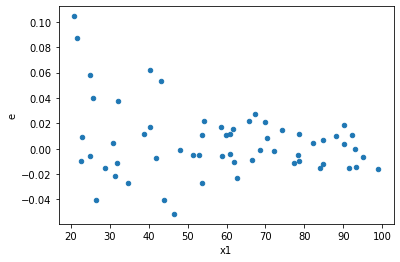

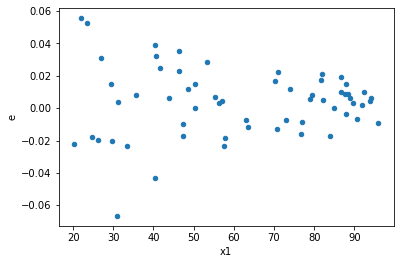

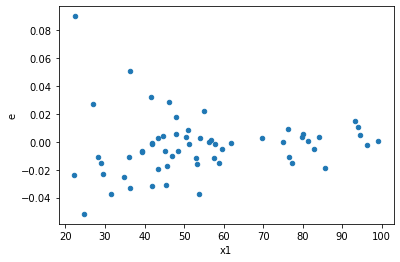

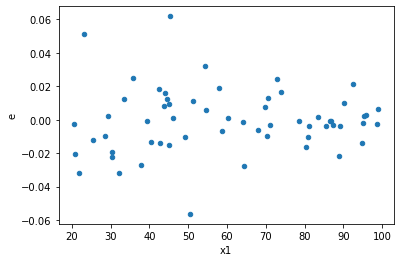

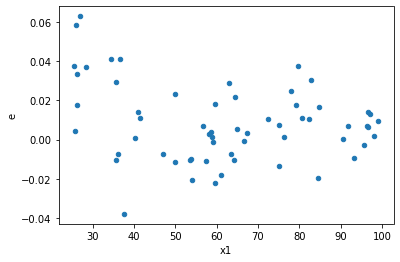

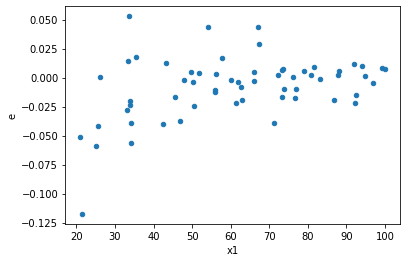

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
963.0,23.0,23.0,0.006755820318936393,0.006886344990896635,0.0002937313182146258,0.0002994063039520276,1.019320329108574,0.9637961262521726,0.5181019368739137,0.4818980631260863,Reject001=1 : Homoscedasticity
978.0,23.0,23.0,0.0033862964718157735,0.004282812064370822,0.0001472302813832945,0.00018620922019003573,1.2647481105144718,0.577877533481661,0.7110612332591695,0.2889387667408305,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,0.036436140938325486,0.004549650540281194,0.0015841800407967602,0.00019781089305570407,0.12486642172073793,4.7006349469588666e-06,Reject001=0 : Heteroscedasticity
1.0,23.0,23.0,0.020764811558303314,0.0025251160058251546,0.0009028178938392745,0.00010978765242718064,0.12160553437892509,3.685163901649245e-06,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,0.020410322767953393,0.0029080407044270703,0.0008874053377371041,0.00012643655236639436,0.1424789180204948,1.5475886923643124e-05,Reject001=0 : Heteroscedasticity
3.0,23.0,23.0,0.02172426607465554,0.003167862836527137,0.0009445333075937192,0.0001377331668055277,0.14582139740144784,1.900549278537691e-05,Reject001=0 : Heteroscedasticity
4.0,23.0,23.0,0.0326794858853591,0.0032266054144244128,0.0014208472124069174,0.0001402871919314962,0.098734889090467,5.17443540933329e-07,Reject001=0 : Heteroscedasticity
5.0,23.0,23.0,0.020717598497418704,0.0023936647600378298,0.0009007651520616828,0.00010407238087121,0.11553775213551257,2.292344603507557e-06,Reject001=0 : Heteroscedasticity
6.0,23.0,23.0,0.021417786315008257,0.0020600656189243075,0.0009312081006525329,8.956807038801336e-05,0.09618480587233898,4.0215440297825753e-07,Reject001=0 : Heteroscedasticity
7.0,23.0,23.0,0.011935167597275862,0.002838020833456983,0.0005189203303163419,0.0001233922101503036,0.2377864248931658,0.0010491985866542377,Reject001=0 : Heteroscedasticity
8.0,23.0,23.0,0.009674798908181709,0.0037474398717452415,0.00042064343079050906,0.00016293216833674964,0.3873403372318298,0.027103909079920545,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    930
Reject001=1 : Homoscedasticity       70
Name: Result_test, dtype: int64